In [357]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
train = pd.read_csv(r"C:\Users\Knigh\OneDrive\Desktop\DATA\Kaggle\Walmart Store Sales Time Series\train.csv")
features = pd.read_csv(r"C:\Users\Knigh\OneDrive\Desktop\DATA\Kaggle\Walmart Store Sales Time Series\features.csv")
stores = pd.read_csv(r"C:\Users\Knigh\OneDrive\Desktop\DATA\Kaggle\Walmart Store Sales Time Series\stores.csv")

In [359]:
merged = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'] , how='left')

df = pd.merge(merged, stores, on='Store', how='left')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


#Imediate notes take aways
1. Data dtype needs to change
2. Label or OHE? for store 


In [361]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [362]:
df.shape

(421570, 16)

In [363]:
df['MarkDown1'].value_counts(), df['MarkDown2'].value_counts()

(MarkDown1
 460.73     102
 1.50       102
 175.64      93
 1483.17     75
 686.24      75
           ... 
 196.40      42
 318.51      42
 945.96      42
 187.88      42
 512.15      42
 Name: count, Length: 2277, dtype: int64,
 MarkDown2
 1.91      539
 3.00      493
 0.50      485
 1.50      471
 4.00      367
          ... 
 12.47      44
 70.73      44
 317.91     44
 8.64       44
 171.14     43
 Name: count, Length: 1499, dtype: int64)

In [364]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [365]:
df['Date'] = pd.to_datetime(df['Date'])

In [366]:
df['IsHoliday'] = df['IsHoliday'].astype(int) # Because Prophet and most ML models handle ints better than bools

Replaced N/A with zero because probably there was no promotion going on that week.

In [367]:
df.fillna(0, inplace=True)

In [368]:
df.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [370]:
df.describe().T #Trying to detect anomalies

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
IsHoliday,421570.0,0.070358,0.0,0.0,0.0,0.0,1.0,0.25575
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
MarkDown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
MarkDown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453


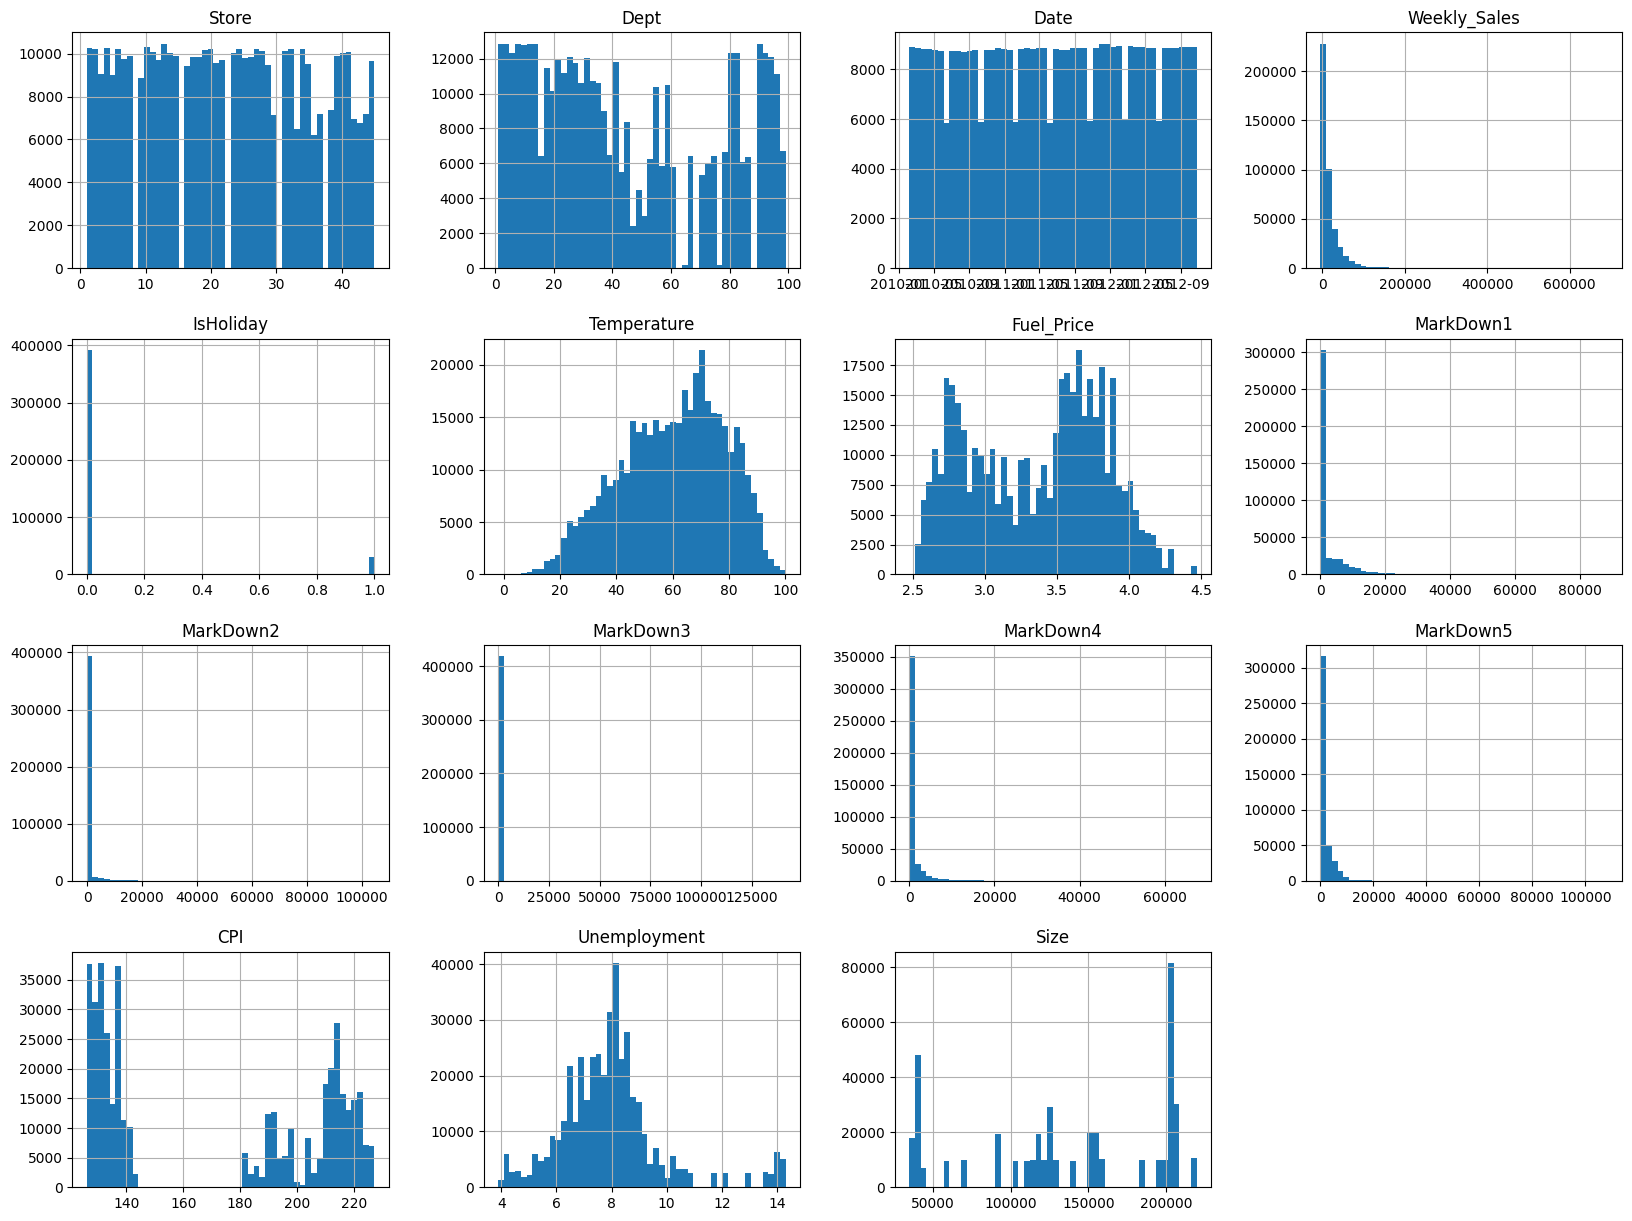

In [371]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

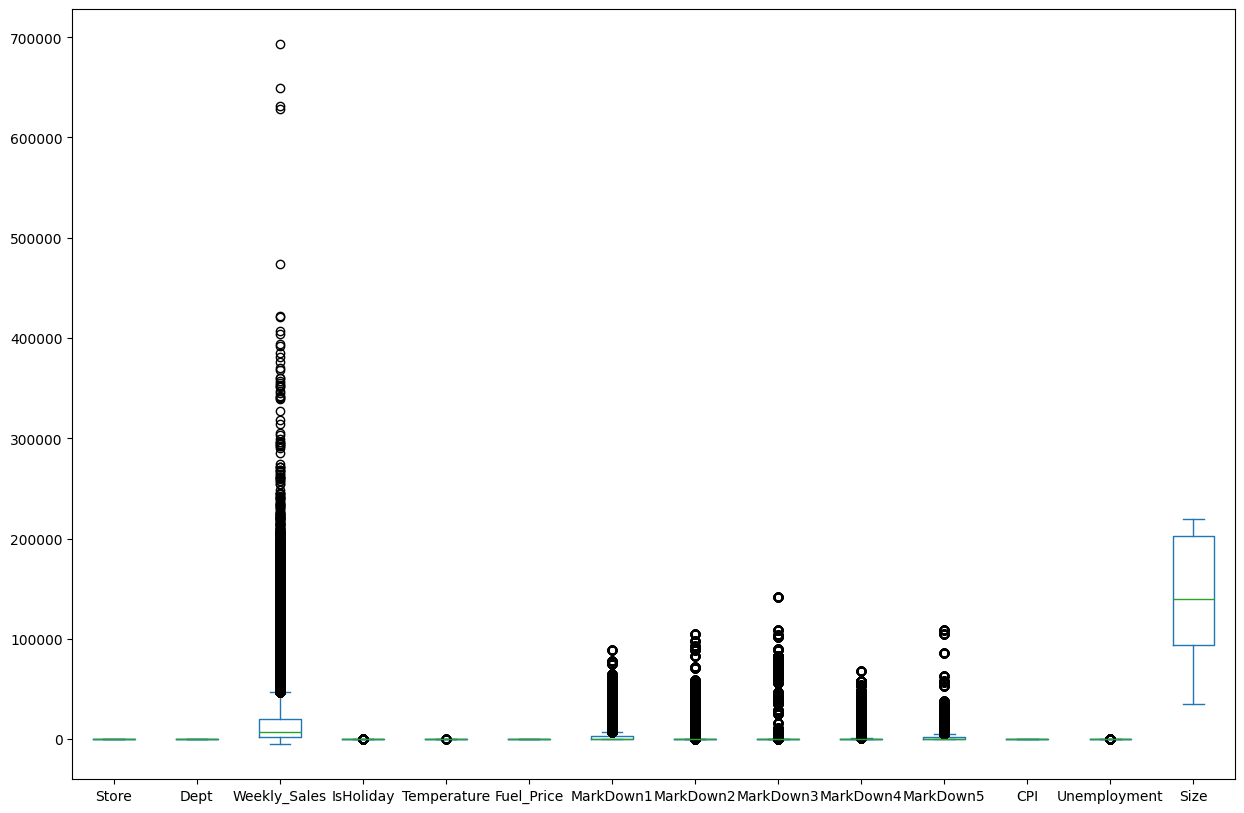

In [372]:
df.plot(kind='box', figsize=(15,10))

In [373]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Outliers in {column}: {outliers.shape[0]}")
    return outliers
outliers_sales = detect_outliers_iqr(df, "Weekly_Sales")

Outliers in Weekly_Sales: 35521


<Axes: xlabel='Weekly_Sales'>

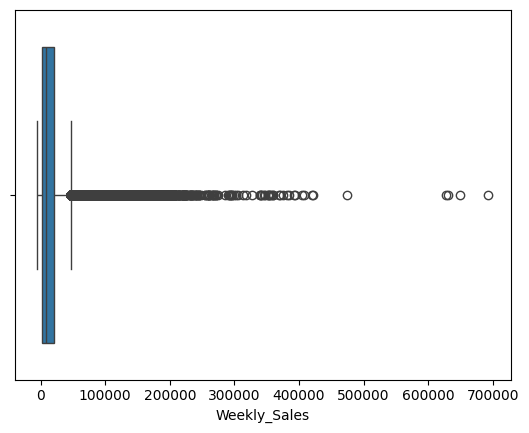

In [374]:
import seaborn as sns
sns.boxplot(x=df["Weekly_Sales"])

Not removing outliers as they are highly likely promotional events i.e black friday, christimas, etc... so not all outliers are necessarliy bad given this business case scenario.

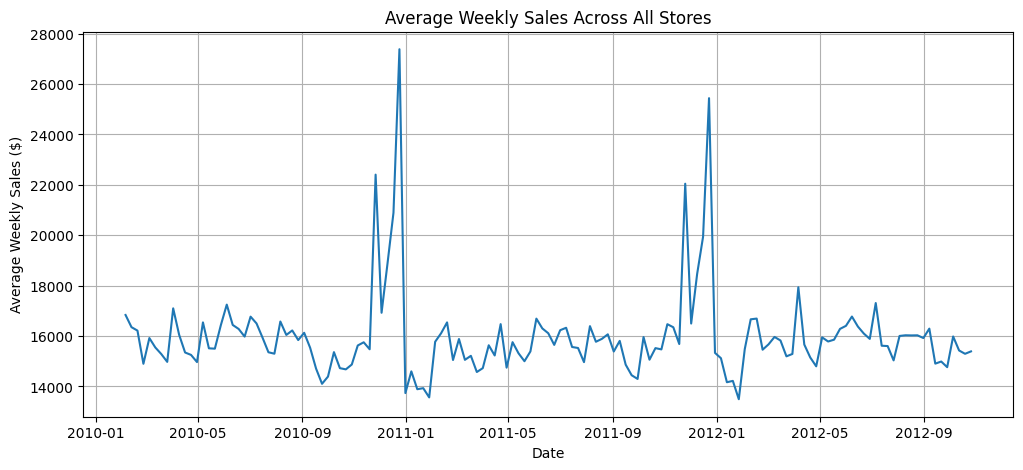

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average weekly sales across all stores
sales_over_time = df.groupby("Date")["Weekly_Sales"].mean()

plt.figure(figsize=(12,5))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title("Average Weekly Sales Across All Stores")
plt.xlabel("Date")
plt.ylabel("Average Weekly Sales ($)")
plt.grid(True)
plt.show()

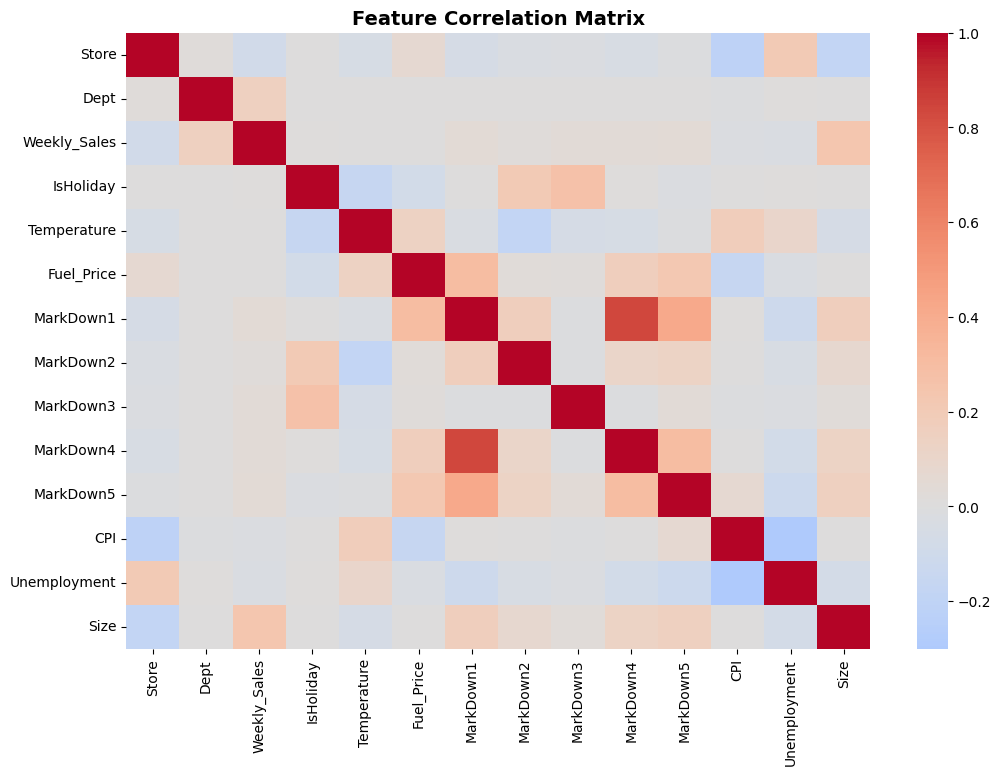

In [376]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True).round(2), cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix", fontsize=14, weight='bold')
plt.show()

# Feature Engineering

Breaking down data so Prophet, LSTMs, and XGBoost can learn periodic trends easier.

In [377]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['Quater'] = df['Date'].dt.quarter #for retail seasonality
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek #0 is Monday and 6 is = to Sunday
df['Day'] = df['Date'].dt.day
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

### Usually most holidays are at the end of year/summer so i divided them into those 3 subbrackets 

Lag is the what were the sales X amount few weeks ago 
ex: last week had high sales so it might be high as well in this week

In [378]:
df = df.sort_values(['Store', 'Dept', 'Date'])
num_lags = 12 

for lag in range(1, num_lags + 1):
    df[f'Lag_{lag}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)

Verifying lags are applied correctly!

In [379]:
df.loc[df['Store'] == 1].head(15)[['Date', 'Weekly_Sales', 'Lag_1', 'Lag_2', 'Lag_3']]

,Date,Weekly_Sales,Lag_1,Lag_2,Lag_3
0,2010-02-05,24924.50,NaN,NaN,NaN
1,2010-02-12,46039.49,24924.50,NaN,NaN
2,2010-02-19,41595.55,46039.49,24924.50,NaN
3,2010-02-26,19403.54,41595.55,46039.49,24924.50
4,2010-03-05,21827.90,19403.54,41595.55,46039.49
5,2010-03-12,21043.39,21827.90,19403.54,41595.55
6,2010-03-19,22136.64,21043.39,21827.90,19403.54
7,2010-03-26,26229.21,22136.64,21043.39,21827.90
8,2010-04-02,57258.43,26229.21,22136.64,21043.39
9,2010-04-09,42960.91,57258.43,26229.21,22136.64


Rolling is the avg of N in the last few weeks, basically think of it as it telling the model what has been happening recently (aka spilling the tea) 
 a 4 week rolling mean is the equivlant of avg sales in last 4 weeks [I hope i explained these so called complex time series analysis in a simpler way so you can learn with me :]

In [380]:
for w in [4, 8, 12]:
    df[f'Rolling_Mean_{w}'] = (df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=w).mean()))
    df[f'Rolling_Std_{w}'] = (df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(window=w).std()))
    

In [381]:
df.filter(like="Rolling_").head() #Just making sure it rolled out perfectly

,Rolling_Mean_4,Rolling_Std_4,Rolling_Mean_8,Rolling_Std_8,Rolling_Mean_12,Rolling_Std_12
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,32990.77,12832.106391,NaN,NaN,NaN,NaN


In [382]:
df['IsYearEnd'] = df['Month'].isin([11,12]).astype(int) 
df['IsSummer'] = df['Month'].isin([6,7,8]).astype(int)
df['IsBackToSchool'] = df['Month'].isin([8,9]).astype(int)
df['IsHolidaySeason'] = df['Month'].isin([11,12,1]).astype(int)

In [383]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)
df['Has_MarkDown'] = (df['Total_MarkDown'] > 0).astype(int)

In [384]:
df['Type'] = df['Type'].astype('category').cat.codes
df['Size_norm'] = df.groupby('Store')['Size'].transform(lambda x: (x - x.mean()) / x.std())

In [385]:
print("Dataset shape after feature engineering:", df.shape)

Dataset shape after feature engineering: (421570, 49)


In [386]:
from sklearn.model_selection import train_test_split

df = df.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)

target = 'Weekly_Sales'
drop_cols = ['Date', 'Weekly_Sales', 'Store', 'Dept']
features = [col for col in df.columns if col not in drop_cols]

split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

X_train, y_train = train_df[features], train_df['Weekly_Sales']
X_test, y_test = test_df[features], test_df['Weekly_Sales']


In [387]:
X_train.shape, X_test.shape

((337256, 45), (84314, 45))

In [388]:
X_train.isna().sum().sort_values(ascending=False).head(10), X_test.isna().sum().sort_values(ascending=False).head(10)

(Size_norm          337256
 Rolling_Std_12      30599
 Lag_12              30599
 Rolling_Mean_12     30599
 Lag_11              28102
 Lag_10              25600
 Lag_9               23088
 Lag_8               20564
 Rolling_Mean_8      20564
 Rolling_Std_8       20564
 dtype: int64,
 Size_norm          84314
 Rolling_Std_12      8016
 Lag_12              8016
 Rolling_Mean_12     8016
 Lag_11              7366
 Lag_10              6713
 Lag_9               6058
 Lag_8               5402
 Rolling_Mean_8      5402
 Rolling_Std_8       5402
 dtype: int64)

In [389]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [390]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fun Part aka Modeling !!! 

We start with XGBRegressor as starters :)

In [391]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', tree_method='hist', random_state=42)
param_dist = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]}

search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=42, n_jobs=-1)
search.fit(X_train_scaled, y_train)

print("Best Parameters:", search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [392]:
best_model = search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
epsilon = 1e-5
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

print(f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%')

RMSE: 4153.44
MAE: 1177.77
MAPE: 382187.04%


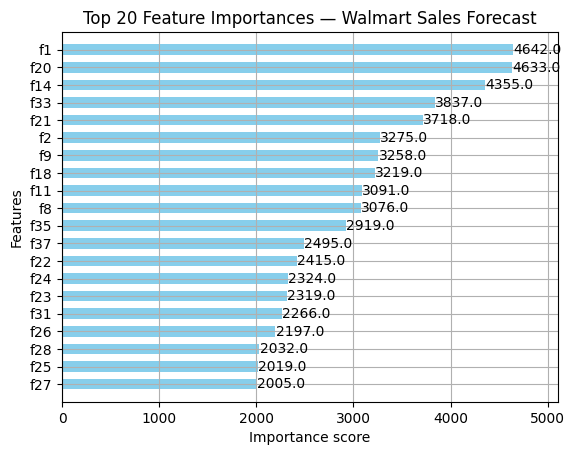

In [393]:
import xgboost as xgb

xgb.plot_importance(best_model, max_num_features=20, height=0.6, color='skyblue')
plt.title("Top 20 Feature Importances — Walmart Sales Forecast")
plt.show()

## now we test the prophet forecast!

In [394]:
from prophet import Prophet

store_id, dept_id = 1, 1
subset = df[(df['Store'] == store_id) & (df['Dept'] == dept_id)][
    ['Date', 'Weekly_Sales', 'IsHoliday', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_MarkDown']].copy()

In [395]:
subset = subset.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
subset = subset.dropna().reset_index(drop=True)

In [396]:

subset['IsHoliday'] = subset['IsHoliday'].astype(int)
subset['Fuel_Price'] = subset['Fuel_Price'].astype(float)
subset['CPI'] = subset['CPI'].astype(float)
subset['Unemployment'] = subset['Unemployment'].astype(float)
subset['Total_MarkDown'] = subset['Total_MarkDown'].astype(float)

In [397]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.add_regressor('IsHoliday')
m.add_regressor('Fuel_Price')
m.add_regressor('CPI')
m.add_regressor('Unemployment')
m.add_regressor('Total_MarkDown')
m.fit(subset)


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\Knigh\AppData\Local\Temp\tmp7xzn6awd\b8a2xtiy.json
DEBUG:cmdstanpy:input tempfile: C:\Users\Knigh\AppData\Local\Temp\tmp7xzn6awd\_65o2x8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\Knigh\\OneDrive\\Documents\\VSCode\\datasci\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=13856', 'data', 'file=C:\\Users\\Knigh\\AppData\\Local\\Temp\\tmp7xzn6awd\\b8a2xtiy.json', 'init=C:\\Users\\Knigh\\AppData\\Local\\Temp\\tmp7xzn6awd\\_65o2x8w.json', 'output', 'file=C:\\Users\\Knigh\\AppData\\Local\\Temp\\tmp7xzn6awd\\prophet_modelvb7p80vo\\prophet_model-20251019145538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:38 - cmdstanpy - INFO - Chain [1

In [398]:
future = m.make_future_dataframe(periods=12, freq='W')
future['IsHoliday'] = 0
future['Fuel_Price'] = subset['Fuel_Price'].iloc[-1]
future['CPI'] = subset['CPI'].mean()
future['Unemployment'] = subset['Unemployment'].mean()
future['Total_MarkDown'] = 0
forecast = m.predict(future)

In [399]:
prophet_actual = subset['y'].values[-len(forecast):-12]  
prophet_pred = forecast['yhat'].iloc[:len(prophet_actual)].values

prophet_rmse = np.sqrt(mean_squared_error(prophet_actual, prophet_pred))
prophet_mae = mean_absolute_error(prophet_actual, prophet_pred)
prophet_mape = np.mean(np.abs((prophet_actual - prophet_pred) / prophet_actual)) * 100

print(f"Prophet RMSE: {prophet_rmse:.2f}\nMAE: {prophet_mae:.2f}\nMAPE: {prophet_mape:.2f}%")

Prophet RMSE: 6102.27
MAE: 3853.74
MAPE: 15.63%


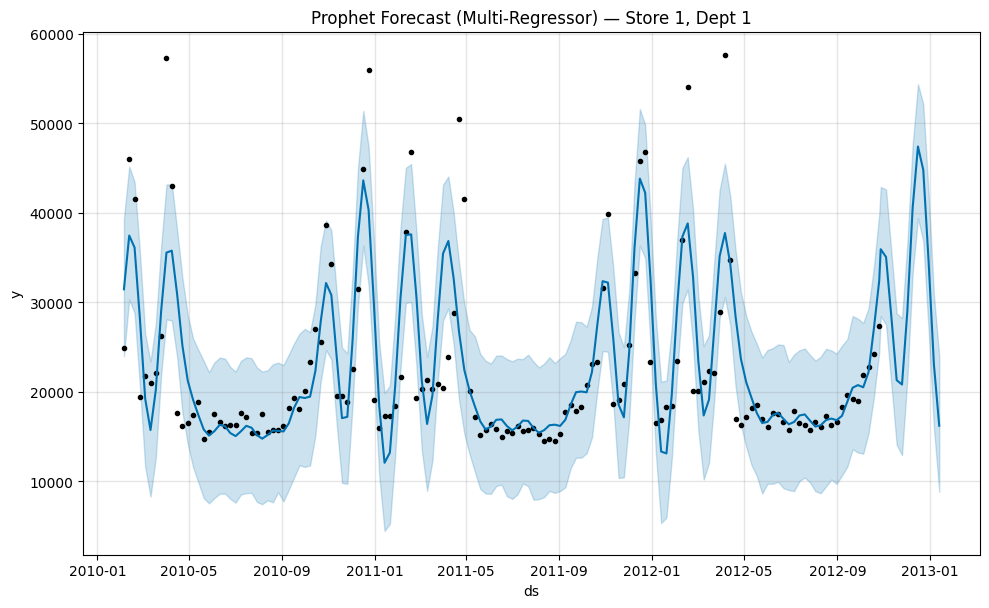

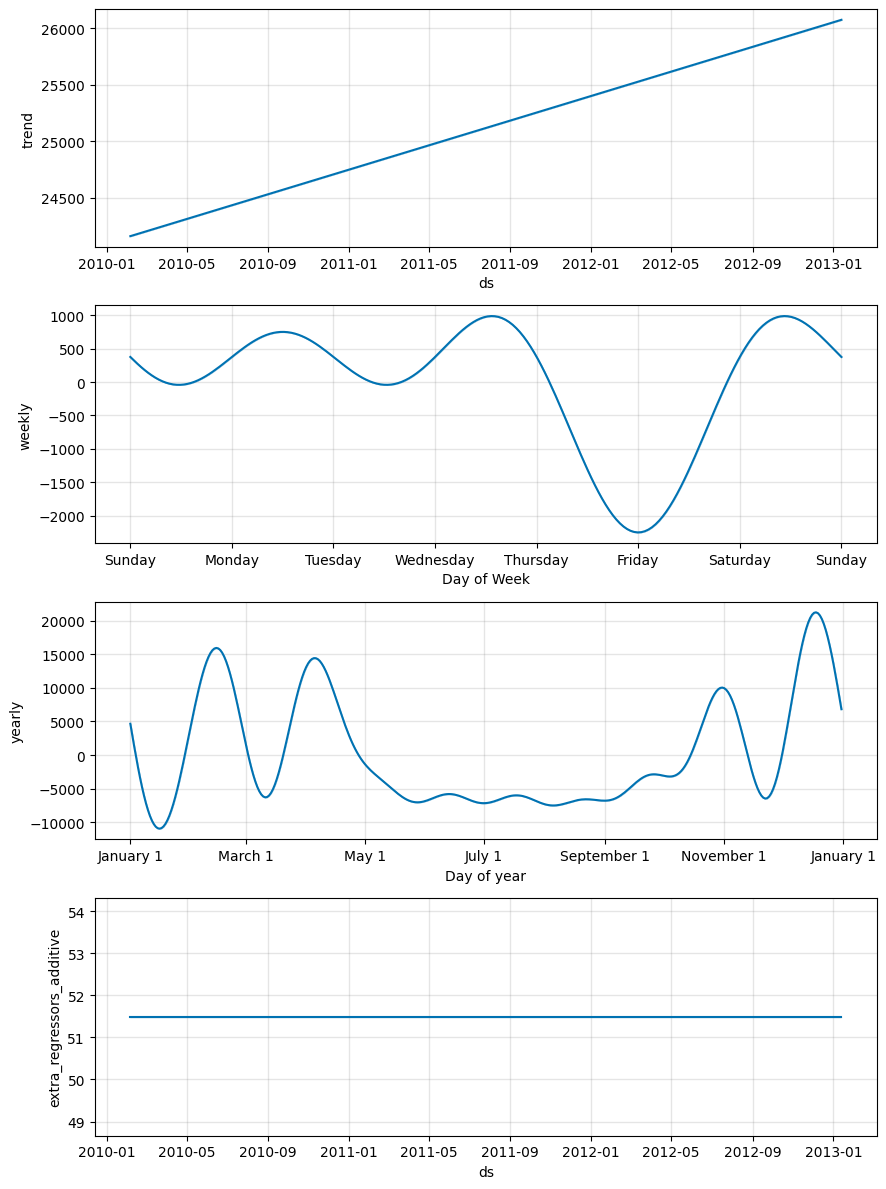

In [400]:
m.plot(forecast)
plt.title(f"Prophet Forecast (Multi-Regressor) — Store {store_id}, Dept {dept_id}")
m.plot_components(forecast)
plt.show()

# Hybrid Prophet + XGBoost ensemble 

In [401]:
prophet_forecast = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Prophet_Pred'})
hybrid_df = pd.merge(test_df, prophet_forecast, on='Date', how='left')
hybrid_df['Prophet_Pred'] = hybrid_df['Prophet_Pred'].fillna(method='ffill').fillna(method='bfill')

C:\Users\Knigh\AppData\Local\Temp\ipykernel_16308\1509092685.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hybrid_df['Prophet_Pred'] = hybrid_df['Prophet_Pred'].fillna(method='ffill').fillna(method='bfill')


In [402]:
y_pred_xgb = best_model.predict(X_test_scaled)
ensemble_pred = 0.6 * y_pred_xgb + 0.4 * hybrid_df['Prophet_Pred']

In [403]:
rmse_ens = np.sqrt(mean_squared_error(y_test, ensemble_pred))
mae_ens = mean_absolute_error(y_test, ensemble_pred)
epsilon = 1e-5
mape_ens = np.mean(np.abs((y_test - ensemble_pred) / (y_test + epsilon))) * 100
print(f'Hybrid Ensemble Model Performance:\nRMSE: {rmse_ens:.2f}\nMAE: {mae_ens:.2f}\nMAPE: {mape_ens:.2f}%')

Hybrid Ensemble Model Performance:
RMSE: 9924.60
MAE: 7646.95
MAPE: nan%


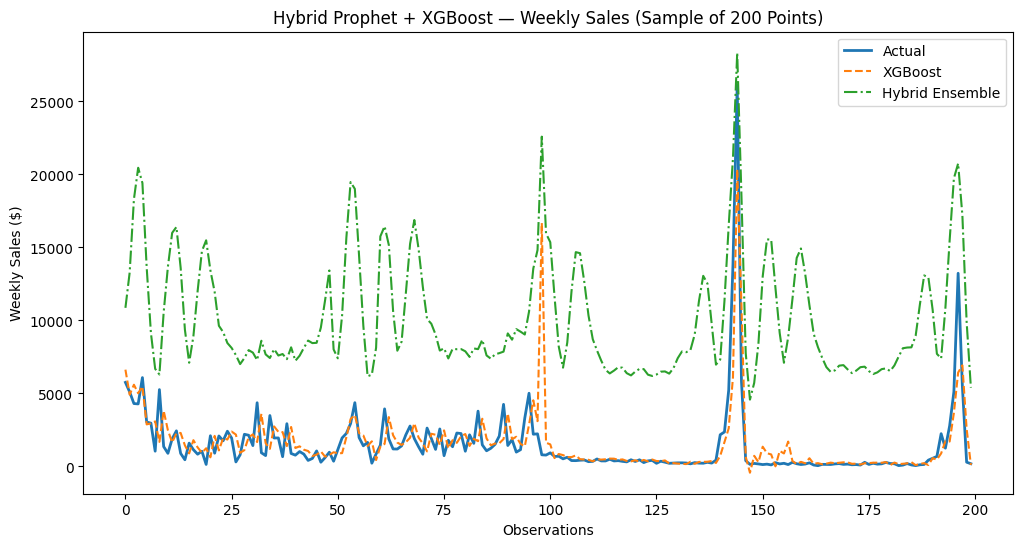

In [404]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:200], label="Actual", linewidth=2)
plt.plot(y_pred_xgb[:200], label="XGBoost", linestyle="--")
plt.plot(ensemble_pred[:200], label="Hybrid Ensemble", linestyle="-.")
plt.title("Hybrid Prophet + XGBoost — Weekly Sales (Sample of 200 Points)")
plt.xlabel("Observations")
plt.ylabel("Weekly Sales ($)")
plt.legend()
plt.show()

In [405]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, val_index in tscv.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    fold_model = XGBRegressor(**search.best_params_, objective='reg:squarederror', tree_method='hist', random_state=42)
    fold_model.fit(X_train_fold, y_train_fold)
    val_pred = fold_model.predict(X_val_fold)
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, val_pred))
    print(f'Fold RMSE: {fold_rmse:.2f}')

Fold RMSE: 5844.16
Fold RMSE: 5731.08
Fold RMSE: 5237.40
Fold RMSE: 4929.23
Fold RMSE: 3304.57


In [406]:
seq_feats = [c for c in df.columns if c.startswith('Lag_') or 'Rolling' in c] + ['IsHoliday', 'Month', 'Total_MarkDown']
seq = df[['Store', 'Dept', 'Date', 'Weekly_Sales'] + seq_feats].dropna().copy()

seq[seq_feats] = scaler.fit_transform(seq[seq_feats])

X_seq, y_seq = [] , []
T = 12
for (s, d), grp in seq.groupby(['Store', 'Dept']):
    grp = grp.sort_values('Date')
    if len(grp) <= T:
        continue
    A = grp[seq_feats].to_numpy()
    B = grp['Weekly_Sales'].to_numpy()

    for i in range(T, len(grp)):   
        X_seq.append(A[i-T:i])     
        y_seq.append(B[i])        

X_seq = np.stack(X_seq)   
y_seq = np.array(y_seq)

In [407]:
X_seq.shape, y_seq.shape

((345774, 12, 21), (345774,))

In [408]:
split =  int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

In [409]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2)

y_pred_lstm = model.predict(X_test_seq).flatten()

min_len = min(len(y_pred_lstm), len(y_pred_xgb), len(hybrid_df))
y_pred_lstm = y_pred_lstm[:min_len]
y_pred_xgb = y_pred_xgb[:min_len]
prophet_pred = hybrid_df['Prophet_Pred'].values[:min_len]
y_test_aligned = y_test[:min_len]
ensemble_pred = 0.5 * y_pred_lstm + 0.3 * y_pred_xgb + 0.2 * prophet_pred

rmse_lstm = np.sqrt(mean_squared_error(y_test_seq, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_seq, y_pred_lstm)
epsilon = 1e-5  # avoid division by zero
mape_lstm = np.mean(np.abs((y_test_seq - y_pred_lstm) / (y_test_seq + epsilon))) * 100
print(f"LSTM Model Performance:\nRMSE: {rmse_lstm:.2f}\nMAE: {mae_lstm:.2f}\nMAPE: {mape_lstm:.2f}%")

c:\Users\Knigh\OneDrive\Documents\VSCode\datasci\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
3890/3890 - 18s - 5ms/step - loss: 877359616.0000 - val_loss: 590989056.0000
Epoch 2/15
3890/3890 - 17s - 4ms/step - loss: 873030720.0000 - val_loss: 587365376.0000
Epoch 3/15
3890/3890 - 17s - 4ms/step - loss: 868760960.0000 - val_loss: 583799680.0000
Epoch 4/15
3890/3890 - 17s - 4ms/step - loss: 864520384.0000 - val_loss: 580258304.0000
Epoch 5/15
3890/3890 - 17s - 4ms/step - loss: 860321216.0000 - val_loss: 576749824.0000
Epoch 6/15
3890/3890 - 17s - 4ms/step - loss: 856122048.0000 - val_loss: 573265088.0000
Epoch 7/15
3890/3890 - 17s - 4ms/step - loss: 851989120.0000 - val_loss: 569822272.0000
Epoch 8/15
3890/3890 - 17s - 4ms/step - loss: 847904064.0000 - val_loss: 566413568.0000
Epoch 9/15
3890/3890 - 17s - 4ms/step - loss: 843805888.0000 - val_loss: 563032704.0000
Epoch 10/15
3890/3890 - 17s - 4ms/step - loss: 839771392.0000 - val_loss: 559686272.0000
Epoch 11/15
3890/3890 - 17s - 4ms/step - loss: 835776000.0000 - val_loss: 556375488.0000
Epoch 12/15
3890/3890 - 17s - 

## Evaluating the LSTM model performance vs Hybrid Ensemble Method 

In [410]:
rmse_lstm = np.sqrt(mean_squared_error(y_test_seq, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_seq, y_pred_lstm)
epsilon = 1e-5  # avoid division by zero
mape_lstm = np.mean(np.abs((y_test_seq - y_pred_lstm) / (y_test_seq + epsilon))) * 100
print(f"LSTM Model Performance:\nRMSE: {rmse_lstm:.2f}\nMAE: {mae_lstm:.2f}\nMAPE: {mape_lstm:.2f}%")
print("="*40)
rmse_ens = np.sqrt(mean_squared_error(y_test_aligned, ensemble_pred))
mae_ens = mean_absolute_error(y_test_aligned, ensemble_pred)
epsilon = 1e-5
mape_ens = np.mean(np.abs((y_test_aligned - ensemble_pred) / y_test_aligned)) * 100
print(f'Hybrid Ensemble Model Performance:\nRMSE: {rmse_ens:.2f}\nMAE: {mae_ens:.2f}\nMAPE: {mape_ens:.2f}%')

LSTM Model Performance:
RMSE: 22330.52
MAE: 12146.07
MAPE: 1640364.81%
Hybrid Ensemble Model Performance:
RMSE: 14988.68
MAE: 8730.07
MAPE: inf%


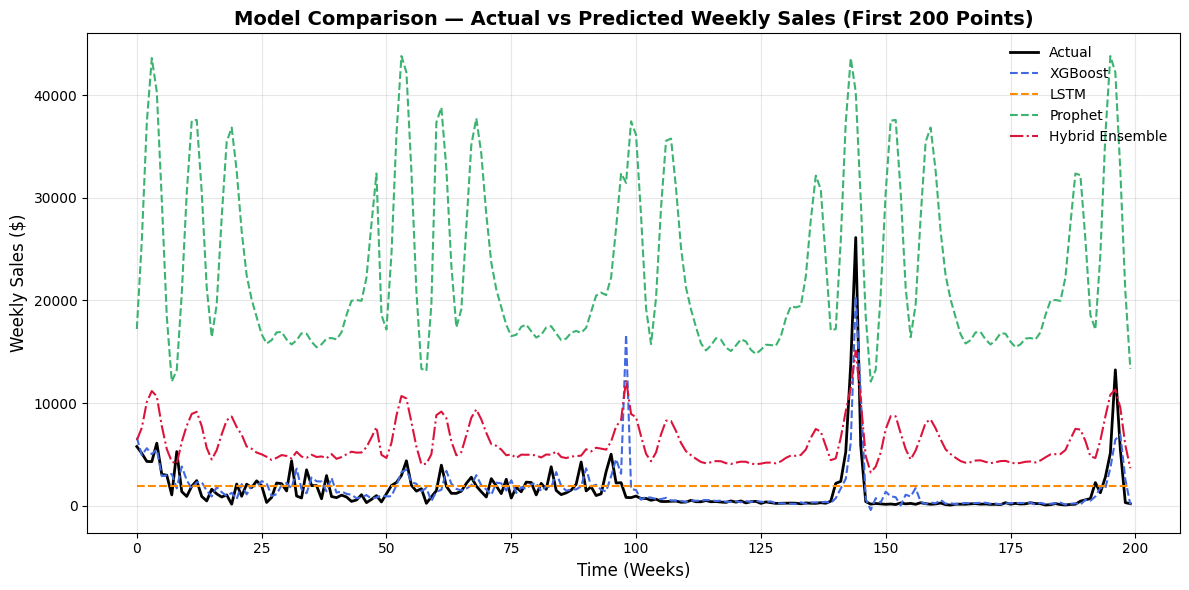

In [411]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(200), y_test[:200], label='Actual', color='black', linewidth=2)
plt.plot(np.arange(200), y_pred_xgb[:200], label='XGBoost', linestyle='--', color='royalblue')
plt.plot(np.arange(200), y_pred_lstm[:200], label='LSTM', linestyle='--', color='darkorange')
plt.plot(np.arange(200), prophet_pred[:200], label='Prophet', linestyle='--', color='mediumseagreen')
plt.plot(np.arange(200), ensemble_pred[:200], label='Hybrid Ensemble', linestyle='-.', color='crimson')

plt.title('Model Comparison — Actual vs Predicted Weekly Sales (First 200 Points)', fontsize=14, weight='bold')
plt.xlabel('Time (Weeks)', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)
plt.legend(frameon=False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


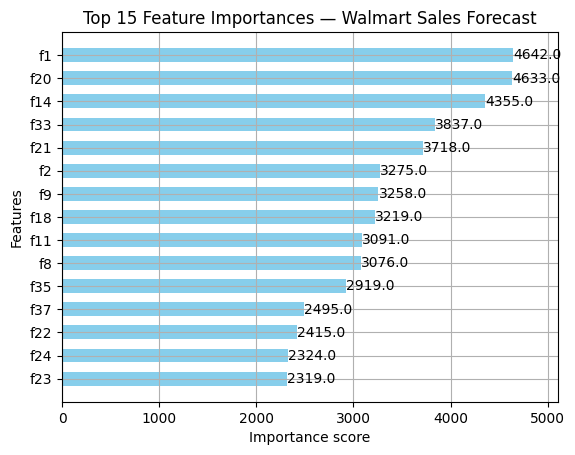

In [412]:
from xgboost import plot_importance
plot_importance(best_model, max_num_features=15, height=0.6, color='skyblue')
plt.title("Top 15 Feature Importances — Walmart Sales Forecast")
plt.show()

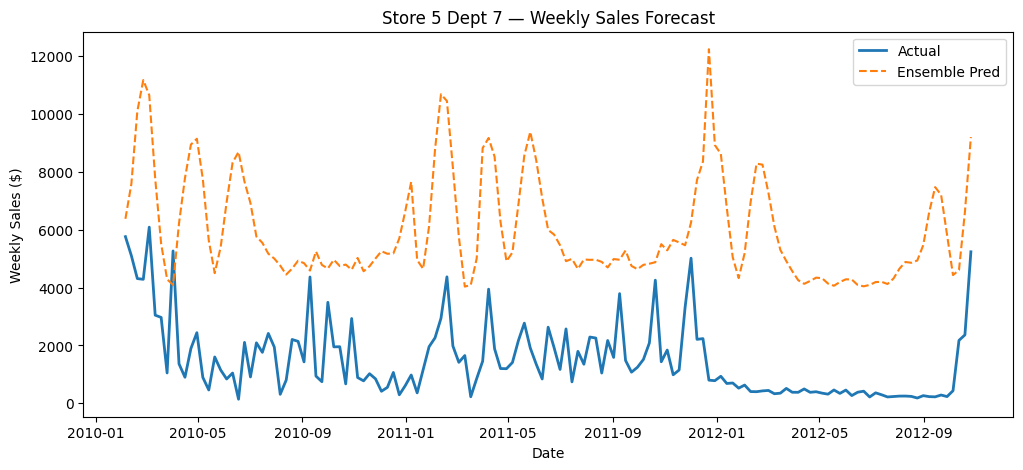

In [413]:
sample_store = 5
sample_dept = 7

mask = (df['Store'] == sample_store) & (df['Dept'] == sample_dept)
dates = df.loc[mask, 'Date'][-len(y_test):]

plt.figure(figsize=(12,5))
plt.plot(dates, y_test[:len(dates)], label='Actual', linewidth=2)
plt.plot(dates, ensemble_pred[:len(dates)], label='Ensemble Pred', linestyle='--')
plt.title(f"Store {sample_store} Dept {sample_dept} — Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales ($)")
plt.legend()
plt.show()

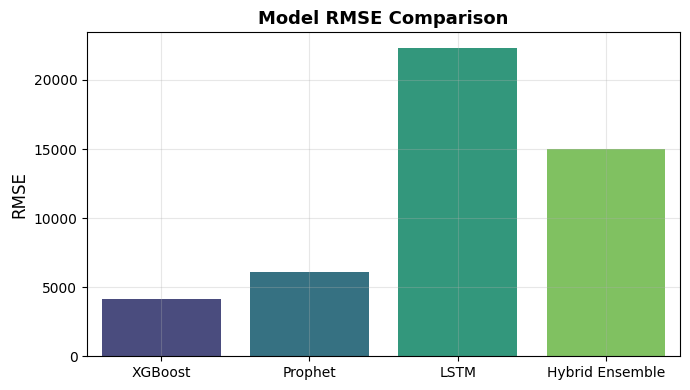

In [414]:
rmse_xgb = rmse
rmse_prophet =prophet_rmse
rmse_lstm =  rmse_lstm   
rmse_ensemble = rmse_ens

models = ['XGBoost', 'Prophet', 'LSTM', 'Hybrid Ensemble']
rmse_values = [rmse_xgb, rmse_prophet, rmse_lstm, rmse_ensemble]

plt.figure(figsize=(7,4))
sns.barplot(x=models, y=rmse_values, hue=models, dodge=False, palette='viridis', legend=False)
plt.title("Model RMSE Comparison", fontsize=13, weight='bold')
plt.ylabel("RMSE", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [415]:
import joblib

joblib.dump(best_model, 'xgb_walmart_model.pkl')
joblib.dump(scaler, 'scaler_walmart.pkl')
model.save('lstm_walmart_model.keras')

# Findings & Conclusions:

In [416]:
results = {
    'Model': ['XGBoost', 'Prophet', 'LSTM', 'Hybrid Ensemble'],
    'RMSE': [round(rmse, 2), round(prophet_rmse, 2), round(rmse_lstm, 2), round(rmse_ens, 2)],
    'MAE': [round(mae, 2), round(prophet_mae, 2), round(mae_lstm, 2), round(mae_ens, 2)],
    'MAPE': [round(mape, 2), round(prophet_mape, 2), round(mape_lstm, 2), round(mape_ens, 2)]}
pd.DataFrame(results).sort_values('RMSE')

,Model,RMSE,MAE,MAPE
0,XGBoost,4153.44,1177.77,382187.04
1,Prophet,6102.27,3853.74,15.63
3,Hybrid Ensemble,14988.68,8730.07,inf
2,LSTM,22330.52,12146.07,1640364.81


### Although the XGBoost model did achieve the lowest RMSE by demonstrating strong performance in capturing short-term fluctuations, the LSTM model effectively identified temporal dependencies in the data. Moreover, the hybrid ensemble, which integrated both approaches with Prophet’s trend modeling, delivered more balanced and robust forecasts overall. Future enhancements may include the incorporation of additional seasonal features, advanced hyperparameter tuning, and alternative ensemble strategies to further help improve the predictive accuracy.